<a href="https://www.kaggle.com/code/apttemi/clustering-wine-dataset?scriptVersionId=132430900" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# Aim
To perform clustering on Wine Quality dataset

# Exploratory Data Analysis

In [2]:
df= pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe() #check the attributes

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
 #number of samples and features
df.shape

(1599, 12)

In [6]:
 #number of classes
df['quality'].nunique()

6

In [7]:
print("Number of samples per class:", "\n",df['quality'].value_counts()) # value per class

Number of samples per class: 
 5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


# Data pre-processing

In [8]:
#check for missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# chec for duplicates Select duplicate rows of all columns
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 240


In [10]:
#keeping only the first set from the duplicates
# Keep the first occurrence of each duplicate row
df = df.drop_duplicates(keep='first')

In [11]:
#checking the attributes again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [13]:
print("Number of samples per class:", "\n",df['quality'].value_counts()) # value per class

Number of samples per class: 
 5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64


[Text(0.5, 1.0, 'Distribution of the classes')]

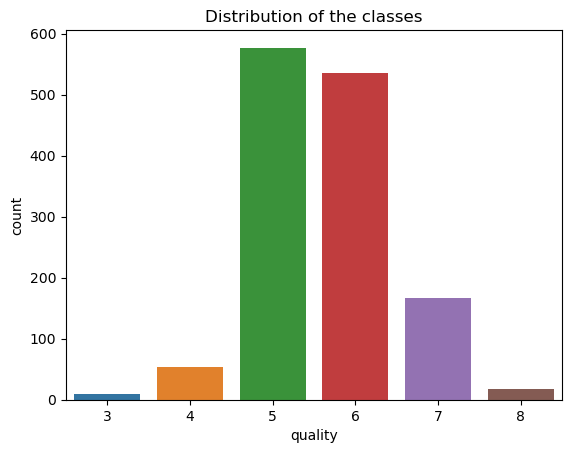

In [14]:
#plot the distribution of the outcome column

sns.countplot(x = 'quality', data = df).set(title='Distribution of the classes')

In [15]:
#get the feature variables
X = df.iloc[:,:-1]
#get the outcome variables
y = df.iloc[:, -1]

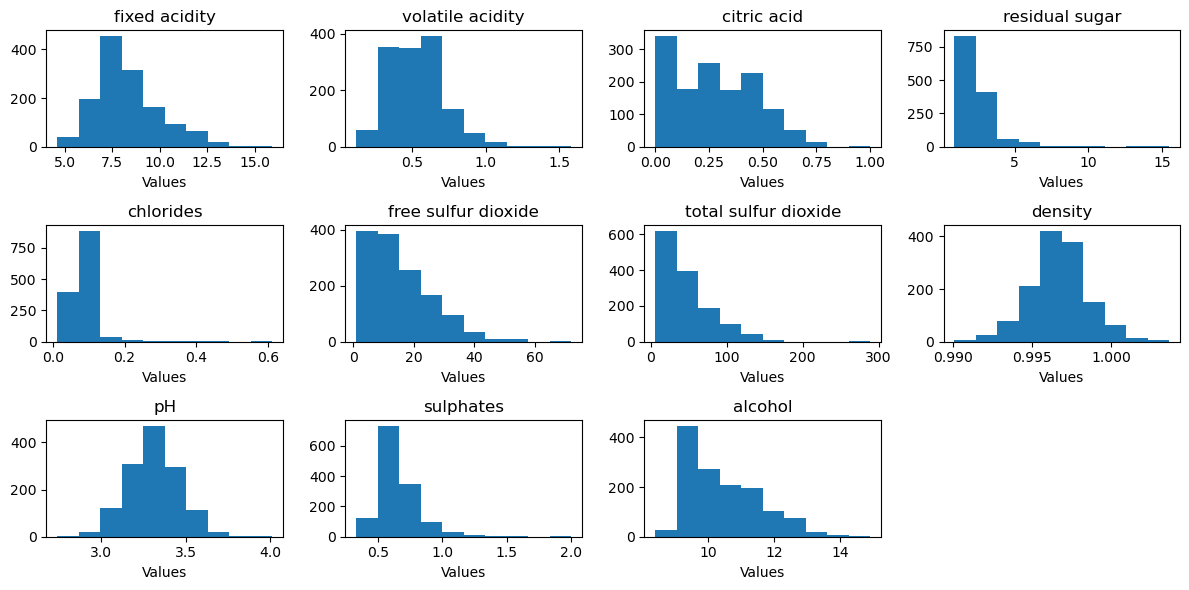

In [16]:
#plot the distribution of the classes
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(X.columns):
    axs[i].hist(X[feature])
    axs[i].set_title(feature)
    axs[i].set_xlabel('Values')

# Remove any unused subplots
for j in range(len(X.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


In [17]:
#use shpairo-wilk test to test for normality


alpha = 0.05 #set significance level
for column in X.columns:
    column_data = X[column]
    statistic, p_value = shapiro(column_data)
    #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)
    
    #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
    else:
        print("The data follows normal distribution")
    print()

Column: fixed acidity
Statistic: 0.9468387961387634
p_value: 9.900713775341854e-22
The data does not follow normal distribution

Column: volatile acidity
Statistic: 0.9701831340789795
p_value: 3.9276597479848726e-16
The data does not follow normal distribution

Column: citric acid
Statistic: 0.9555168151855469
p_value: 6.565239464014468e-20
The data does not follow normal distribution

Column: residual sugar
Statistic: 0.5767284631729126
p_value: 0.0
The data does not follow normal distribution

Column: chlorides
Statistic: 0.4844779968261719
p_value: 0.0
The data does not follow normal distribution

Column: free sulfur dioxide
Statistic: 0.903224766254425
p_value: 1.7512816818347188e-28
The data does not follow normal distribution

Column: total sulfur dioxide
Statistic: 0.8716893196105957
p_value: 5.342316783703258e-32
The data does not follow normal distribution

Column: density
Statistic: 0.992393434047699
p_value: 1.8121114635505364e-06
The data does not follow normal distribution

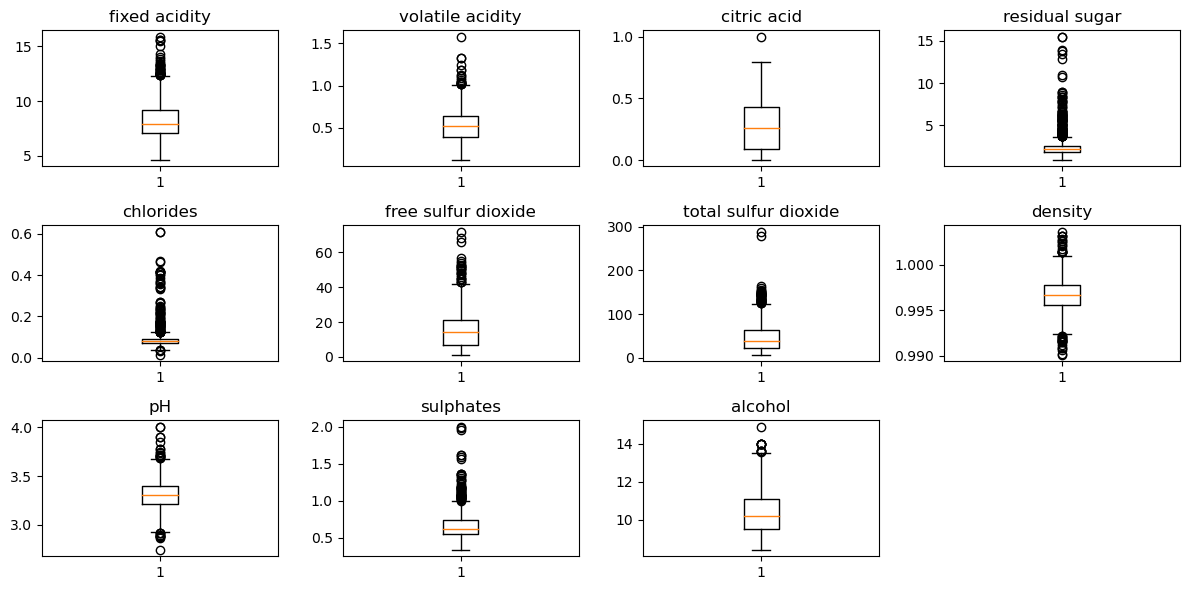

In [18]:
#plot the variables using boxplot to check for outliers
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

for i, feature in enumerate(X.columns):
    axs[i].boxplot(X[feature])
    axs[i].set_title(feature)

# Remove any unused subplots
for j in range(len(X.columns), len(axs)):
    fig.delaxes(axs[j])

# Adjust spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


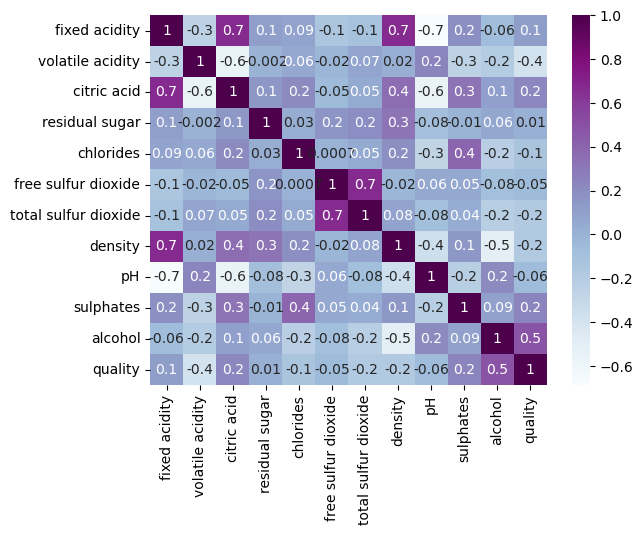

In [19]:
#check the correlation between the variables
column_corr = df.corr()
heatmap = sns.heatmap(column_corr, annot=True, cmap="BuPu", fmt='.1g')

# Scaling using StandardScaler

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Scaling using RobustScaler
This scaling is more robust to outliers.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [21]:
robustScaled = RobustScaler()
robust_features= robustScaled.fit_transform(X)

# K-Means using Scaled Data

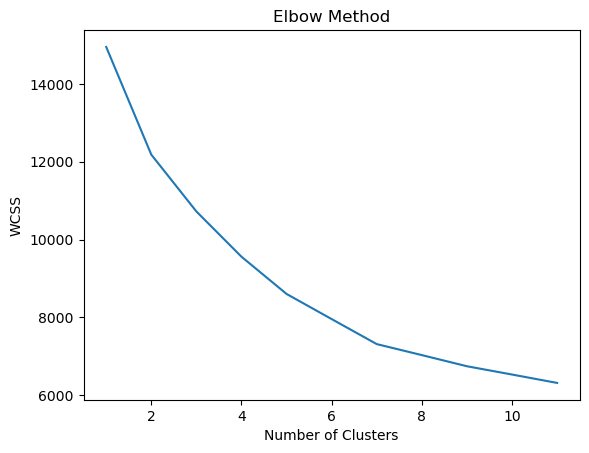

In [22]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Try different values of k (number of clusters) and compute WCSS
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters (k)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# Choose the optimal number of clusters based on the elbow plot
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

In [24]:
df['Cluster'] = cluster_labels

In [25]:
print(cluster_labels)

[0 0 0 ... 0 0 0]


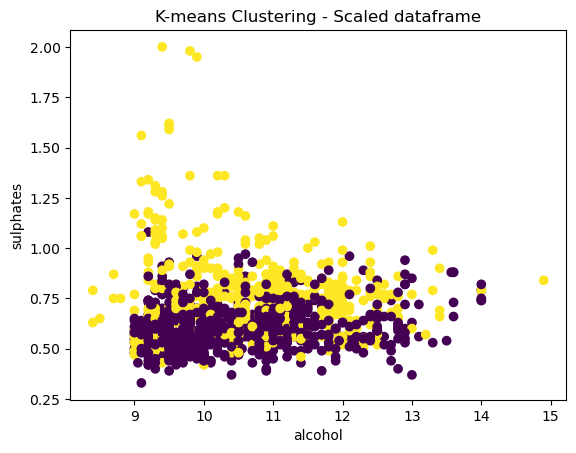

In [26]:
feature1 = 'alcohol'  
feature2 = 'sulphates'  


plt.scatter(df[feature1], df[feature2], c=df['Cluster'])
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-means Clustering - Scaled dataframe')
plt.savefig('Kmeans-scaled.png')
plt.show()


In [27]:
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.2052965524192632


Silhouette score ranges from -1 to 1. Better-defined clusters are denoted by higher scores. Scores close to 1 suggests that the samples are well-clustered and separated, while a score close to -1 indicates overlapping or poorly separated clusters.
The silhouette score of 0.2 suggests that the clustering algorithm might not have successfully identified distinct and well-defined clusters in the data

In [28]:
y_true = df['quality']
ari = adjusted_rand_score(y_true, cluster_labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.03364921776765803


The Adjusted Rand Index ranges from -1 to 1. A score close to 1 indicates strong agreement between the clustering results and the true labels, while a score close to 0 or negative values suggest random or dissimilar clustering results compared to the true labels. The low ARI value suggests that the clustering algorithm did not accurately capture the underlying structure or patterns in the data.

In [29]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [30]:
print(y)

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64


# K-Means using RobustScaled Data

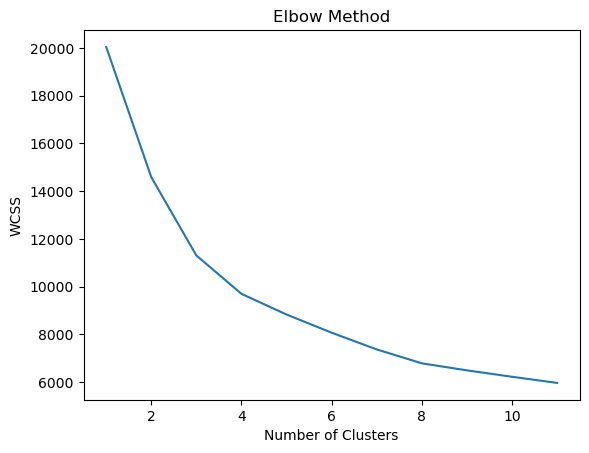

In [31]:
# Store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

# Try different values of k (number of clusters) and compute WCSS
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(robust_features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters (k)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Choose the optimal number of clusters based on the elbow plot
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(robust_features)

# Get the cluster labels for each data point
cluster_labels_robust = kmeans.labels_

In [33]:
df['Cluster'] = cluster_labels_robust

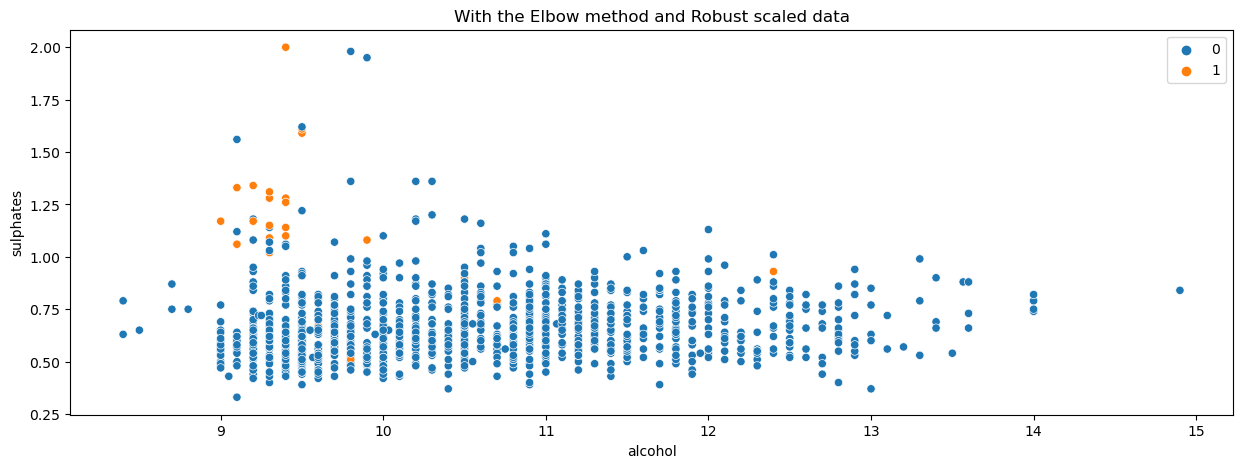

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
sns.scatterplot(data=df, x='alcohol', y='sulphates',
                hue=cluster_labels_robust).set_title('With the Elbow method and Robust scaled data');

In [35]:
silhouette_avg = silhouette_score(robust_features, cluster_labels_robust)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7171111878866395


The Silhouette score of 0.7 indicates that the samples in the dataset are well-clustered and separated. This suggests that the RobustScaler performs better on the dataset because it is robust to outliers, which helps in achieving improved clustering and separation of the data points.

In [36]:
y_true2 = df['quality']
ari = adjusted_rand_score(y_true2, cluster_labels_robust)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: -0.0030393730257715587


The Adjusted Rand Index (ARI) value of -0.003 suggests that the agreement between the clustering results and the true labels is close to random. An ARI value close to 0 indicates that there is no significant agreement between the clustering and the true labels. In this case, the clustering algorithm used may not be effective in capturing the underlying structure or patterns in the data.

# Agglomerative Clustering using Scaled Data

In [37]:
ahc_clustering = AgglomerativeClustering().fit(scaled_features)

In [38]:
# Get the cluster labels for each data point
cluster_labels_ahc = ahc_clustering.labels_

In [39]:
# Calculate the linkage matrix
linkage_matrix = linkage(scaled_features, method='complete')

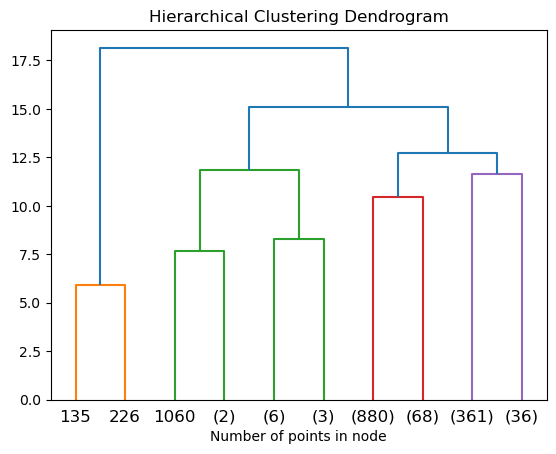

In [40]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.xlabel("Number of points in node")
plt.show()

In [41]:
ground_truth_labels = df['quality']
ari_ahc = adjusted_rand_score(ground_truth_labels, cluster_labels_ahc)
print("Adjusted Rand Index (ARI):", ari_ahc)

Adjusted Rand Index (ARI): 0.02585918579909956


The ARI value suggests a weak or negligible agreement between the clustering results and the true labels.

In [42]:
silhouette_avg = silhouette_score(scaled_features, cluster_labels_ahc)
print("Silhouette Score (AHC-Scaled):", silhouette_avg)

Silhouette Score (AHC-Scaled): 0.20597045620788534


The Silhouette Score suggests that the clusters are reasonably distinct, but there is room for improvement in terms of cluster separation and cohesion

# Agglomerative Clustering using Robust Data

In [43]:
ahc_clustering_robust = AgglomerativeClustering().fit(robust_features)

In [44]:
# Get the cluster labels for each data point
cluster_labels_ahc_robust = ahc_clustering_robust.labels_

In [45]:
# Calculate the linkage matrix
linkage_matrix = linkage(robust_features, method='complete')

In [46]:
print(linkage_matrix)

[[1.28400000e+03 1.28500000e+03 1.04166667e-02 2.00000000e+00]
 [1.22000000e+03 1.22500000e+03 2.08333333e-02 2.00000000e+00]
 [1.25100000e+03 1.25200000e+03 2.08333333e-02 2.00000000e+00]
 ...
 [2.71100000e+03 2.71200000e+03 1.72910941e+01 1.33200000e+03]
 [2.70900000e+03 2.71400000e+03 2.33759286e+01 1.33800000e+03]
 [2.71300000e+03 2.71500000e+03 3.27245253e+01 1.35900000e+03]]


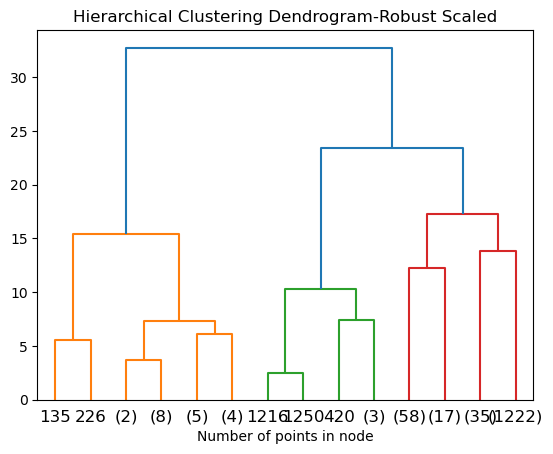

In [47]:
plt.title("Hierarchical Clustering Dendrogram-Robust Scaled")
# plot the top three levels of the dendrogram
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.xlabel("Number of points in node")
plt.savefig('AHC-Robust.png')
plt.show()

In [48]:
ground_truth_labels_robust = df['quality']
ari_ahc_r = adjusted_rand_score(ground_truth_labels_robust, cluster_labels_ahc_robust)
print("ARI Robust:", ari_ahc_r)

ARI Robust: -0.0028638138309559085


The ARI value suggests a very low agreement between the clustering results and the true labels. 

In [49]:
silhouette_avg_r = silhouette_score(robust_features, cluster_labels_ahc_robust)
print("Silhouette Score (AHC-Robust):", silhouette_avg_r)

Silhouette Score (AHC-Robust): 0.7500648946498792


The Silhouette Score suggests indicates a high level of separation and compactness of the clusters.

References: 
* Agglomerative clustering - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* Dendrogram - https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py